In [1]:
import scipy as sc
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pylab as py

from sympy import *
from numpy import *

In [9]:
###CEROCLINAS

#Definición de las ceroclinas
def zclina_x(y,v):
    return y*0+v*0
def zclina_y(y,v,a,b,k):
    return ((k-a)*y)/b*y
def zclina_v(y,v,b,m,k,L):
    return (m*v-k*L*y)/(b*v)

###Valores tomados de la Figura 1c del artículo
a= 0.3
b=0.000001
k=1.2
L=100
m=1.8

/home/dacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/dacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/dacs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1996: RuntimeWarning: invalid value encountered in subtract
  v1[which_pt] = np.array(verts[i,0]) - np.array(verts[i,1])
/home/dacs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1997: RuntimeWarning: invalid value encountered in subtract
  v2[which_pt] = np.array(verts[i,1]) - np.array(verts[i,2])
/home/dacs/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:1795: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/home/dacs/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:1796: RuntimeWarning: invalid value encountered

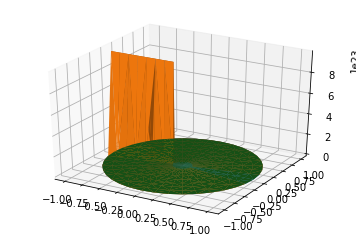

In [13]:
n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
y = np.append(0, (radii*np.cos(angles)).flatten())
v = np.append(0, (radii*np.sin(angles)).flatten())
# Compute z to make the pringle surface.
x1 = zclina_y(y,v,a,b,k)
x2 = zclina_v(y,v,b,m,k,L)
x3 = zclina_x(y,v)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(y, v, x1, linewidth=0.2, antialiased=True)
ax.plot_trisurf(y, v, x2, linewidth=0.2, antialiased=True)
ax.plot_trisurf(y, v, x3, linewidth=0.2, antialiased=True)



plt.show()